**Import Modules**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Import Datasets**

In [ ]:
df= pd.read_csv('https://github.com/V-Vibee/My-Projects/raw/main/7.%20Employee%20Turnover%20Prediction/EmployeeData.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
df.duplicated().sum()

3008

**Dropping the duplcated column**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(11991, 10)

**Exploartory Data Analysis**

In [ ]:
bins= len(df['average_montly_hours'].unique())
bins

215

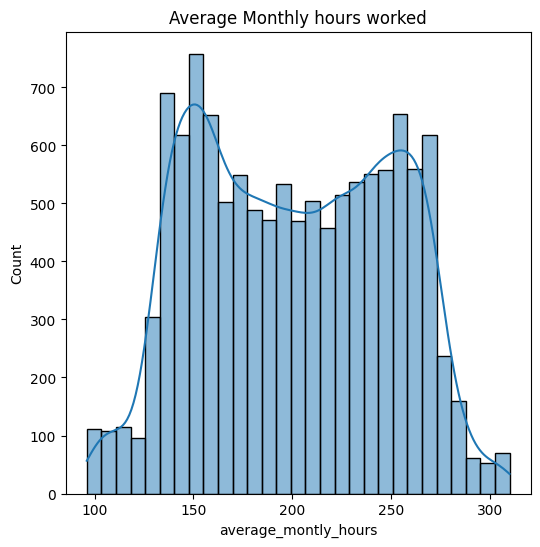

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x= df['average_montly_hours'], kde= True)
plt.title('Average Monthly hours worked')
plt.tight_layout
plt.show()

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

**Number of Projects a person has done**

In [ ]:
df['number_project'].value_counts()

number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

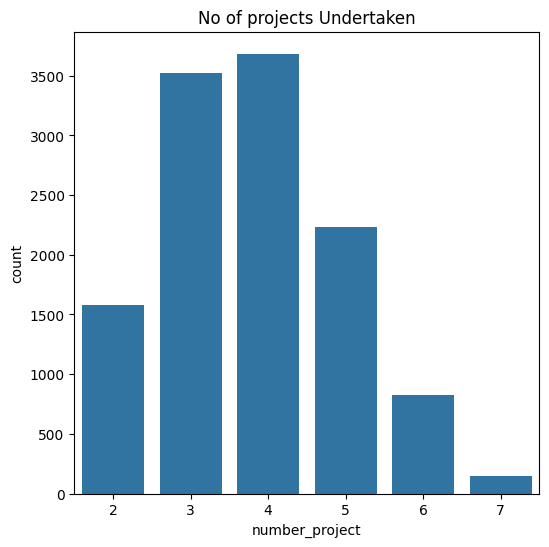

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x= df['number_project'])
plt.title('No of projects Undertaken')
plt.tight_layout
plt.show()

**Promotions info**

In [ ]:
df['promotion_last_5years'].value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

NB: only 203 were promoted

In [ ]:
labels= df['promotion_last_5years'].value_counts().index.tolist()
labels

[0, 1]

In [ ]:
labels = ["Promoted" if i == 1 else "Not Promoted" for i in labels]
labels

['Not Promoted', 'Promoted']

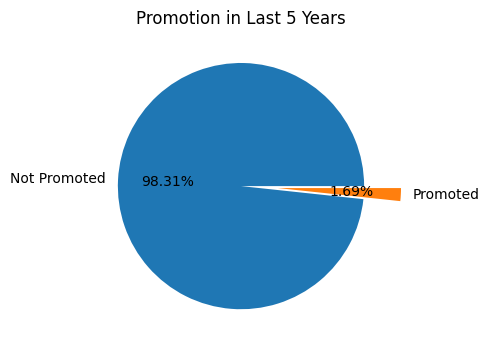

In [ ]:
plt.figure(figsize=(5, 6))
plt.pie(x = df["promotion_last_5years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion in Last 5 Years")
plt.tight_layout()
plt.show()

**Work Accidents**

In [ ]:
df["Work_accident"].value_counts()

Work_accident
0    10141
1     1850
Name: count, dtype: int64

In [ ]:
labels = df["Work_accident"].value_counts().index.tolist()
labels

[0, 1]

In [ ]:
labels = ["Work Accident" if i == 1 else "No Work Accident" for i in labels]
labels

['No Work Accident', 'Work Accident']

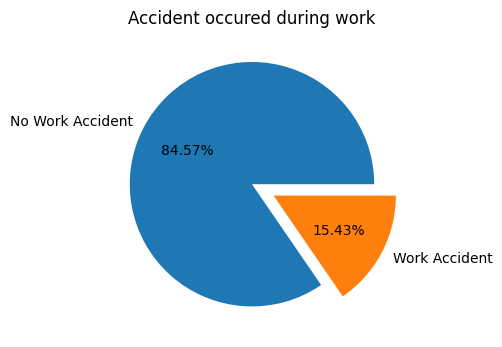

In [ ]:
plt.figure(figsize=(5, 6))
plt.pie(x = df["Work_accident"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.2])
plt.title("Accident occured during work")
plt.tight_layout()
plt.show()

**No of Years Spent working in Company**

In [ ]:
df["time_spend_company"].value_counts()

time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

In [ ]:
labels = df["time_spend_company"].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

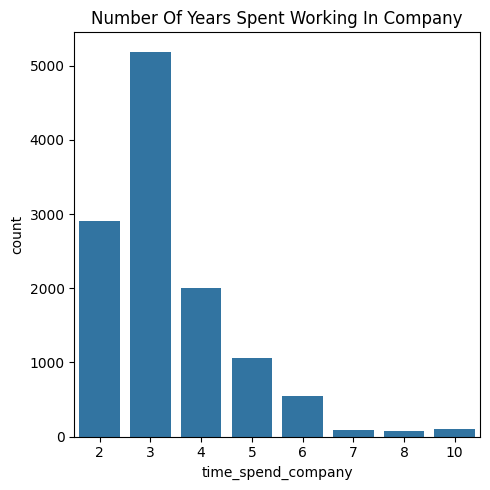

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x = "time_spend_company", data=df)
plt.title("Number Of Years Spent Working In Company")
plt.tight_layout()
plt.show()

In [ ]:
df["time_spend_company"].mean()

3.3648569760653824

**Department Comparison**

In [ ]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df["sales"].value_counts()

sales
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

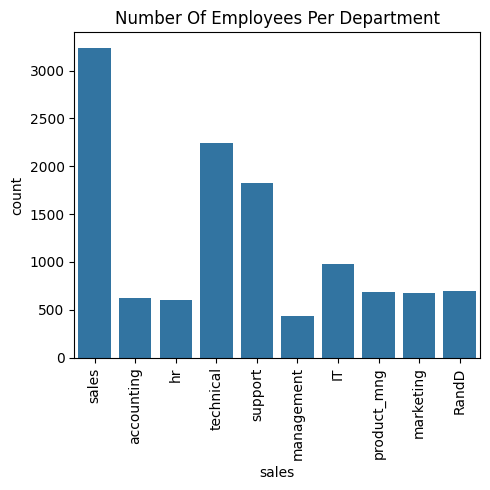

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x = "sales", data=df)
plt.title("Number Of Employees Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df["salary"].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [ ]:
labels = df["salary"].value_counts().index.tolist()
labels

['low', 'medium', 'high']

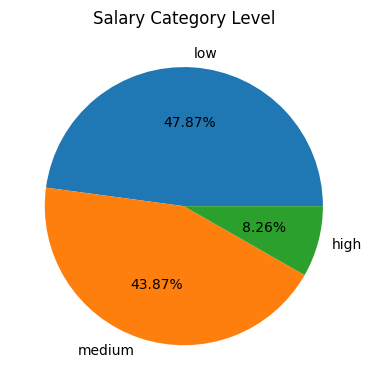

In [ ]:
plt.figure(figsize=(5, 4))
plt.pie(x = df["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Category Level")
plt.tight_layout()
plt.show()

**Data Preprocessing**

In [ ]:
df.rename(columns={"sales": "department", "salary_leve": "salary_level"}, inplace=True)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


**Encoding**

In [ ]:
categorical_cols = ["department", "salary"]
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_montly_hours",
    "time_spend_company",
    "Work_accident",
    "promotion_last_5years",
]


**Create Column Transformer**

In [ ]:
X = df.drop("left", axis=1)
y = df["left"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_cols),
        ("num", MinMaxScaler(), numerical_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

**Making Pipes**

In [ ]:
# Create the pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=2000))])

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['department', 'salary']),
                                                 ('num', MinMaxScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years'])])),
                ('classifier', LogisticRegression(max_iter=2000))])

In [ ]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['department', 'salary']),
                                                 ('num', MinMaxScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years'])])),
                ('classifier', LogisticRegression(max_iter=2000))])

In [ ]:
# Predict using the pipeline
y_pred = pipeline.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8399333055439766

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1994
           1       0.56      0.24      0.34       405

    accuracy                           0.84      2399
   macro avg       0.71      0.60      0.62      2399
weighted avg       0.81      0.84      0.81      2399



**Random Forest using pipe**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create the pipeline
pipeline2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100))])

In [ ]:
pipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['department', 'salary']),
                                                 ('num', MinMaxScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Fit the pipeline
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['department', 'salary']),
                                                 ('num', MinMaxScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Predict using the pipeline
y_pred2 = pipeline2.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred2)

0.9849937473947478

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1994
           1       0.98      0.93      0.95       405

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



**Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [ ]:
parameter = {
    'classifier__criterion': ["gini", "entropy"],
    'classifier__n_estimators': [10, 100, 150, 200],
    'classifier__min_samples_leaf': [1, 2, 4, 6],
    'classifier__max_features': ["auto", "sqrt", "log2"]
}

In [ ]:
# Create the StratifiedKFold object
kfold = StratifiedKFold(n_splits=5)

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(
    pipeline2,
    param_grid=parameter,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1
)

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['department',
                                                                          'salary']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['satisfaction_level',
                                                                          'last_evaluation',
                                                                          'number_project',
                                                                          'average_montly_hours',
                                                                          'time_spend_company',
                                                                          'Work_accident',
                                                                          'promotion_last_5years'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4, 6],
                         'classifier__n_estimators': [10, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__criterion': 'gini', 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 200}


In [ ]:
parameter = {
    'classifier__criterion': ["gini"],
    'classifier__n_estimators': [200],
    'classifier__min_samples_leaf': [1],
    'classifier__max_features': ["auto"]
}

In [ ]:
# Get the best estimator
best_model = grid_search.best_estimator_

In [ ]:
y_pred3 = best_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.9849937473947478